# Import Dataset

In [10]:
!pip install kaggle

In [10]:
data_directory = '../data'

In [11]:
!kaggle datasets download -d mexwell/steamgames -p {data_directory}

Dataset URL: https://www.kaggle.com/datasets/mexwell/steamgames
License(s): other




  0%|          | 0.00/70.8M [00:00<?, ?B/s]
  1%|▏         | 1.00M/70.8M [00:01<01:19, 925kB/s]
  3%|▎         | 2.00M/70.8M [00:01<00:39, 1.84MB/s]
  4%|▍         | 3.00M/70.8M [00:01<00:26, 2.63MB/s]
  6%|▌         | 4.00M/70.8M [00:01<00:20, 3.37MB/s]
  7%|▋         | 5.00M/70.8M [00:01<00:17, 3.99MB/s]
  8%|▊         | 6.00M/70.8M [00:02<00:15, 4.34MB/s]
 10%|▉         | 7.00M/70.8M [00:02<00:13, 4.81MB/s]
 11%|█▏        | 8.00M/70.8M [00:02<00:12, 5.07MB/s]
 13%|█▎        | 9.00M/70.8M [00:02<00:12, 5.00MB/s]
 14%|█▍        | 10.0M/70.8M [00:02<00:12, 5.18MB/s]
 16%|█▌        | 11.0M/70.8M [00:02<00:11, 5.45MB/s]
 17%|█▋        | 12.0M/70.8M [00:03<00:11, 5.22MB/s]
 18%|█▊        | 13.0M/70.8M [00:03<00:11, 5.42MB/s]
 20%|█▉        | 14.0M/70.8M [00:03<00:10, 5.65MB/s]
 21%|██        | 15.0M/70.8M [00:03<00:09, 5.87MB/s]
 23%|██▎       | 16.0M/70.8M [00:03<00:11, 4.94MB/s]
 25%|██▌       | 18.0M/70.8M [00:04<00:08, 6.38MB/s]
 27%|██▋       | 19.0M/70.8M [00:04<00:08, 6.45MB/s]
 2

# Unzip Dataset

In [ ]:
from dotenv import load_dotenv
import zipfile
import os

load_dotenv("../.env")

zip_file_path = os.path.join(os.getenv('DATA_DIRECTORY'), "steamgames.zip")
extract_to_directory = os.getenv('DATA_DIRECTORY')

os.makedirs(extract_to_directory, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

# Import Libraries

In [69]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configutation

In [70]:
pd.set_option('display.max_columns', 40)

# Load Dataset

In [71]:
games = pd.read_csv('../data/games.csv')

In [72]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

In [73]:
games.head(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# Exploratory Data Analysis (EDA)

## Functions

In [74]:
def calculate_limits(df: pd.DataFrame, column : str):
  # Calculate quantiles
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  # Calculate IQR
  RIQ = q3 - q1

  # Calculate lower and upper limits
  lower_limit = max(q1 - 1.5 * RIQ, 0)
  upper_limit = min(q3 + 1.5 * RIQ, df[column].max())

  return lower_limit, upper_limit

def replace_outliers(df : pd.DataFrame, columns : list):
  for column in columns:
    lower_limit, upper_limit = calculate_limits(df, column)

    # Replace outliers
    df[column] = np.where(
    df[column] < lower_limit,
    lower_limit,
    np.where(
        df[column] > upper_limit,
        upper_limit,
        df[column]
        )
    )
  
def count_outliers(df : pd.DataFrame, column: str):
  lower_limit, upper_limit = calculate_limits(df, column)
  return df[(df[column] < lower_limit) | (df[column] > upper_limit)].iloc[:, 0].count()

def plot_hist_box(df : pd.DataFrame, column : str):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

  sns.histplot(games[column], kde = True, ax = ax1)
  sns.boxplot(x = games[column], ax = ax2)

def plot_hist(series : pd.Series, bins : int, size : tuple, kde: bool):
  plt.figure(figsize = size)

  sns.histplot(series, kde = kde, bins = bins)

def plot_box(series : pd.Series, size : tuple):
  plt.figure(figsize = size)

  sns.boxplot(x = series)

## Data Inspection

In [75]:
# Descriptive statistics for numerical columns
games.select_dtypes(include = ["int64", "float64"]).describe().T

,count,mean,std,min,25%,50%,75%,max
AppID,71716.0,1.199222e+06,598223.776787,10.0,700535.00,1176745.00,1692255.00,2379920.0
Peak CCU,71716.0,1.407612e+02,5797.005513,0.0,0.00,0.00,1.00,872138.0
Required age,71716.0,3.434938e-01,2.362128,0.0,0.00,0.00,0.00,21.0
Price,71716.0,7.223055e+00,11.072051,0.0,0.99,4.99,9.99,999.0
DLC count,71716.0,6.153857e-01,14.932853,0.0,0.00,0.00,0.00,2366.0
Metacritic score,71716.0,3.834207e+00,16.437707,0.0,0.00,0.00,0.00,97.0
User score,71716.0,4.496904e-02,1.901272,0.0,0.00,0.00,0.00,100.0
Positive,71716.0,1.114753e+03,26522.457248,0.0,1.00,9.00,59.00,5764420.0
Negative,71716.0,1.821155e+02,4975.205765,0.0,0.00,3.00,18.00,895978.0
Score rank,42.0,9.890476e+01,0.878178,97.0,98.00,99.00,100.00,100.0


In [76]:
# Descriptive statistics for categorical columns
games.select_dtypes(include = "object").describe().T

,count,unique,top,freq
Name,71715,71170,Shadow of the Tomb Raider: Definitive Edition,20
Release date,71716,4170,"Dec 1, 2022",97
Estimated owners,71716,14,0 - 20000,47372
About the game,69280,68942,Help the beautiful girls to immerse themselves...,53
Supported languages,71716,9663,['English'],37560
Full audio languages,71716,1935,[],41313
Reviews,9167,9074,“The most ambitious in the modern trilogy” 9/1...,20
Header image,71716,71612,https://cdn.akamai.steamstatic.com/steam/apps/...,20
Website,35073,28855,https://www.facebook.com/8FloorGames/,242
Support url,36250,23995,https://www.facebook.com/8FloorGames,270


## Data Cleaning

In [77]:
# Drop column AppID
games.drop(columns = ['AppID'], inplace = True)

In [78]:
# Columns that will not be used for analysis
not_useful_columns = ['Name', 'About the game', 'Full audio languages',
                      'Header image', 'Support email', 'Developers', 'Publishers', 'Categories',
                      'Tags', 'Screenshots', 'Movies']

In [79]:
games.drop(columns = not_useful_columns, inplace = True)

In [80]:
# Check for missing values on based on percentage
null_percentage = (games.isnull().sum() / games.shape[0]) * 100 

In [81]:
# Columns with more than 15% missing values
cols_del = null_percentage[null_percentage > 15]

In [82]:
cols_del

Reviews           87.217636
Website           51.094595
Support url       49.453400
Metacritic url    94.731998
Score rank        99.941436
Notes             85.439790
dtype: float64

In [83]:
# Drop columns with more than 15% missing values
games = games.drop(columns = list(cols_del.index))

In [84]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Release date                71716 non-null  object 
 1   Estimated owners            71716 non-null  object 
 2   Peak CCU                    71716 non-null  int64  
 3   Required age                71716 non-null  int64  
 4   Price                       71716 non-null  float64
 5   DLC count                   71716 non-null  int64  
 6   Supported languages         71716 non-null  object 
 7   Windows                     71716 non-null  bool   
 8   Mac                         71716 non-null  bool   
 9   Linux                       71716 non-null  bool   
 10  Metacritic score            71716 non-null  int64  
 11  User score                  71716 non-null  int64  
 12  Positive                    71716 non-null  int64  
 13  Negative                    717

In [85]:
games['Genres'].fillna(value=games['Genres'].mode()[0], inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1704\2096294092.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  games['Genres'].fillna(value=games['Genres'].mode()[0], inplace = True)


In [86]:
games['Release date'] = pd.to_datetime(games['Release date'], format="%b %d, %Y", errors = 'coerce')

In [87]:
games.dropna(axis= 0, inplace = True)

In [88]:
games.duplicated().sum()

1656

In [89]:
games.drop_duplicates(inplace = True)

## Visualization

### Correlation Matrix

In [90]:
corr = games.select_dtypes(include = "number").corr()

<Axes: >

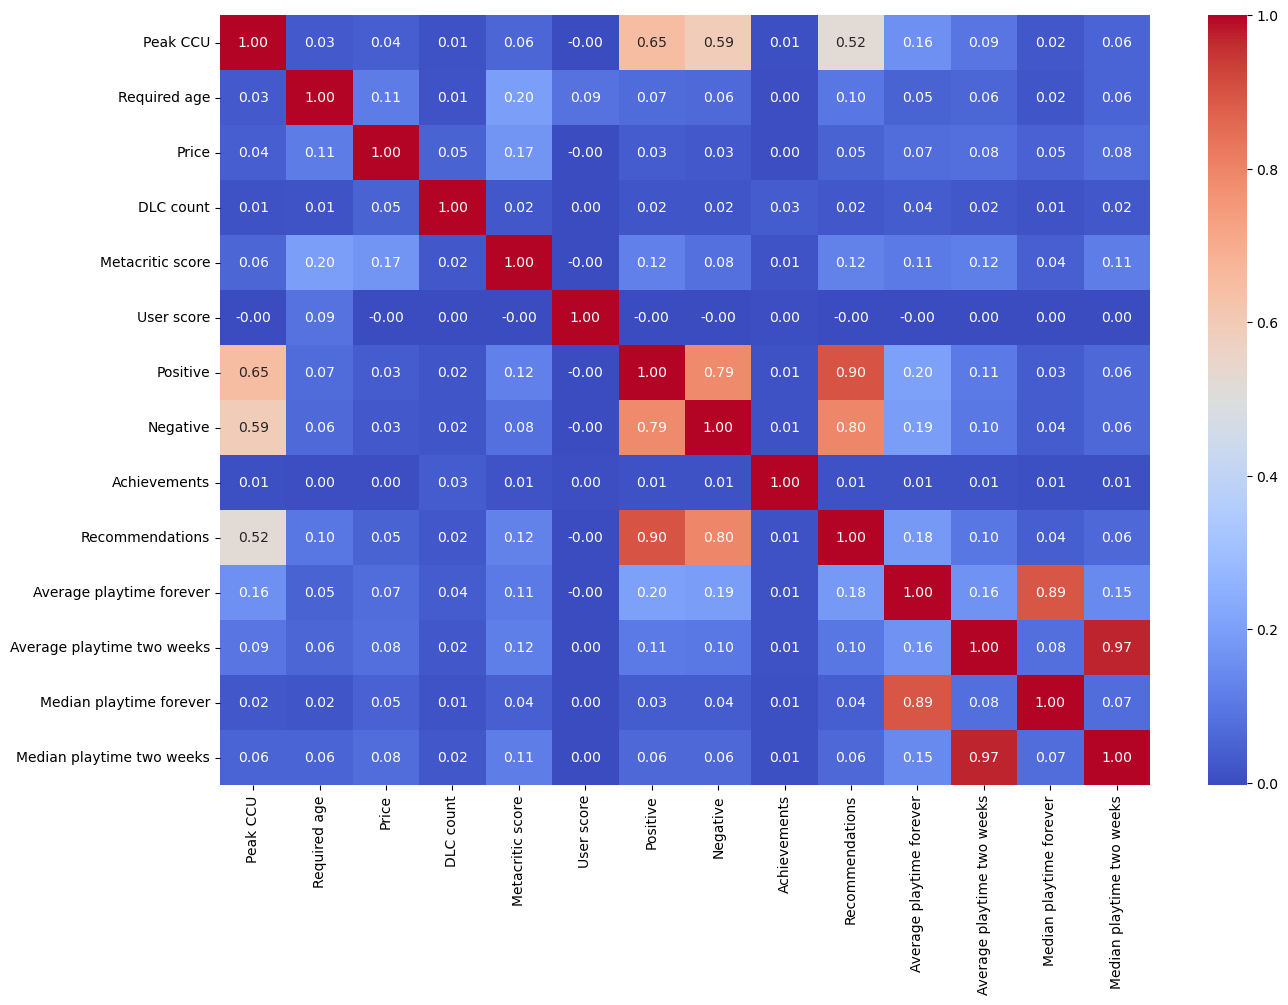

In [91]:
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', )

### Price

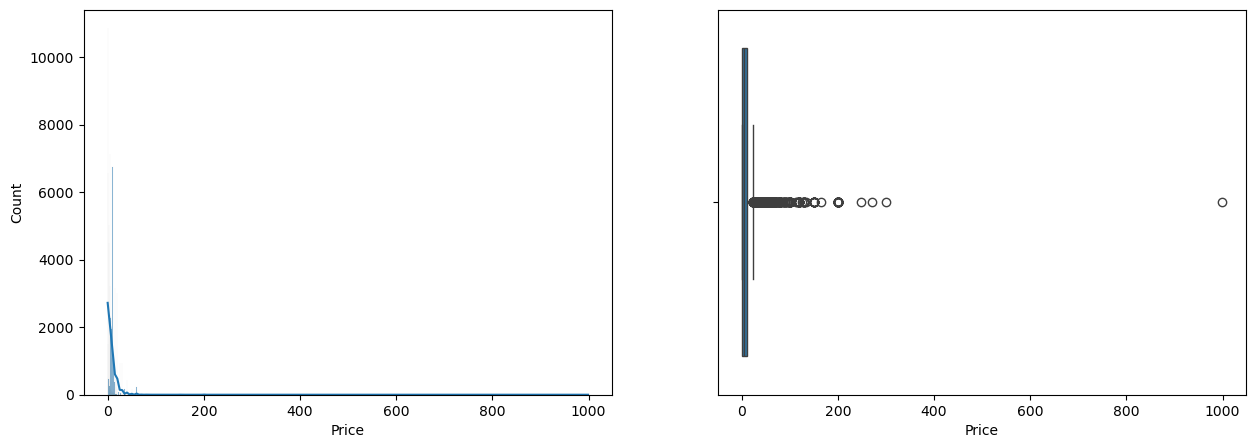

In [92]:
plot_hist_box(games, 'Price')

In [93]:
# Number of outliers in 'Price'
count_outliers(games, 'Price')

3336

### Peak CCU

In [94]:
games['Peak CCU'].describe()

count     69936.000000
mean        143.072323
std        5861.361078
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max      872138.000000
Name: Peak CCU, dtype: float64

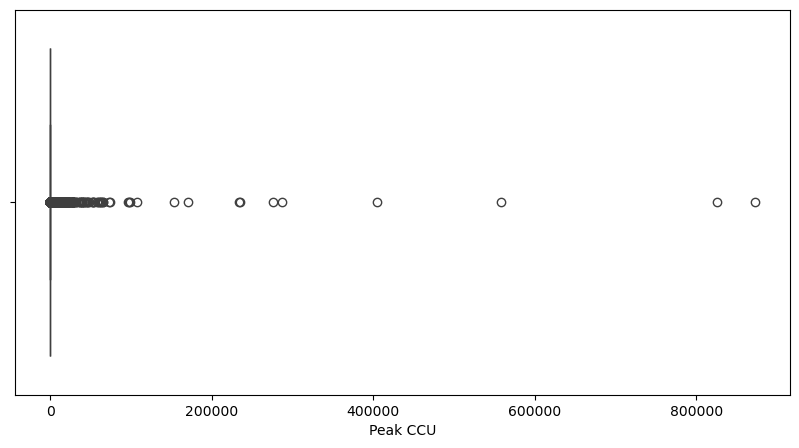

In [95]:
plot_box(games['Peak CCU'], (10, 5))

In [96]:
# Number of outliers in 'Peak CCU'
count_outliers(games, 'Peak CCU')

11034

### Required Age

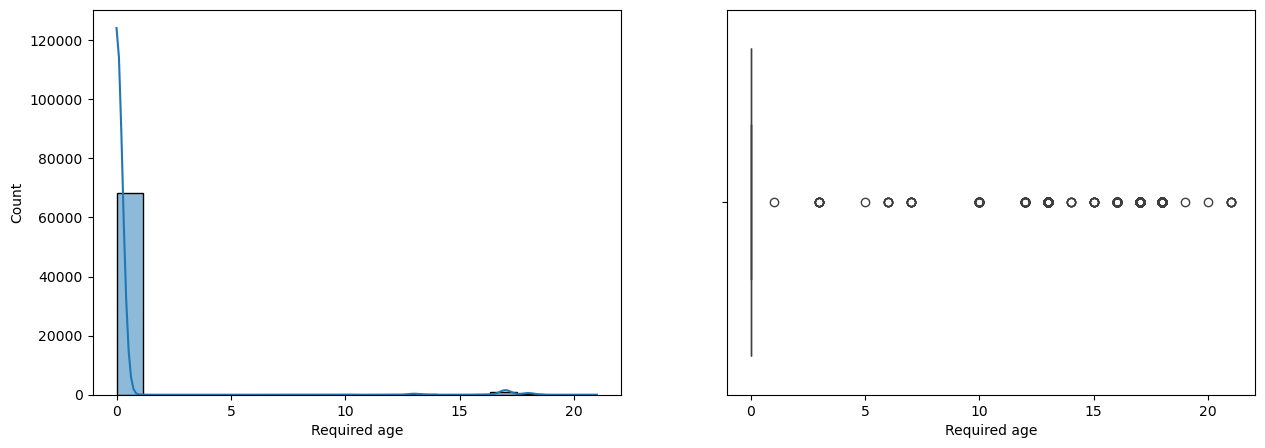

In [97]:
plot_hist_box(games, 'Required age')

In [98]:
count_outliers(games, 'Required age')

1512

### DLC Count

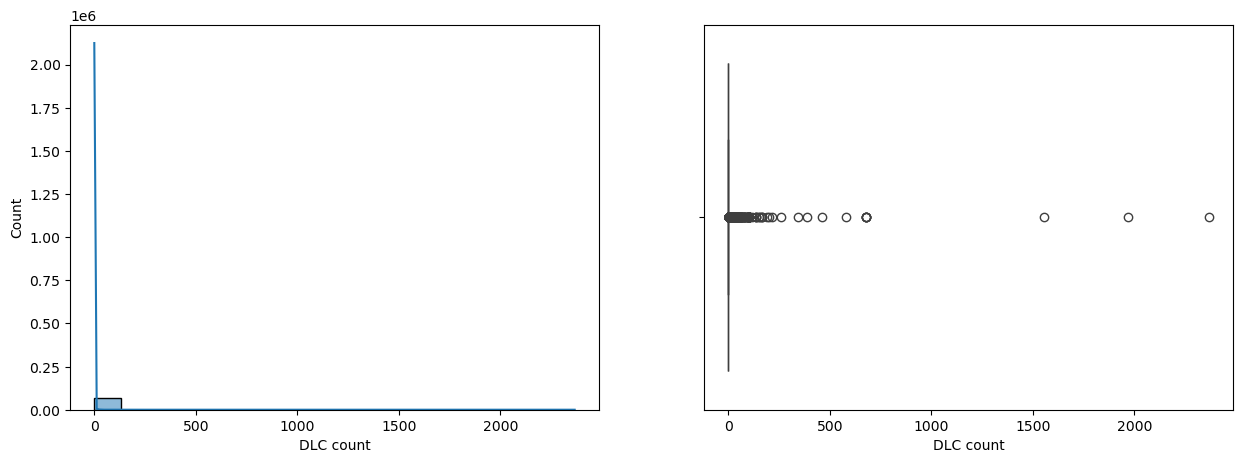

In [99]:
plot_hist_box(games, 'DLC count')

In [100]:
count_outliers(games, 'DLC count')

10816

### Metacritic Score

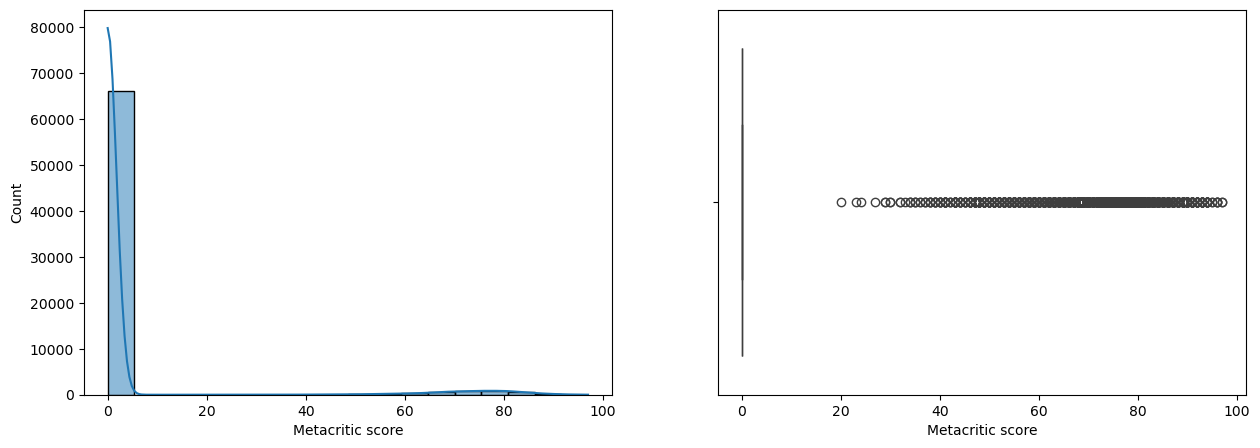

In [101]:
plot_hist_box(games, 'Metacritic score')

In [102]:
count_outliers(games, 'Metacritic score')

3762

### User score

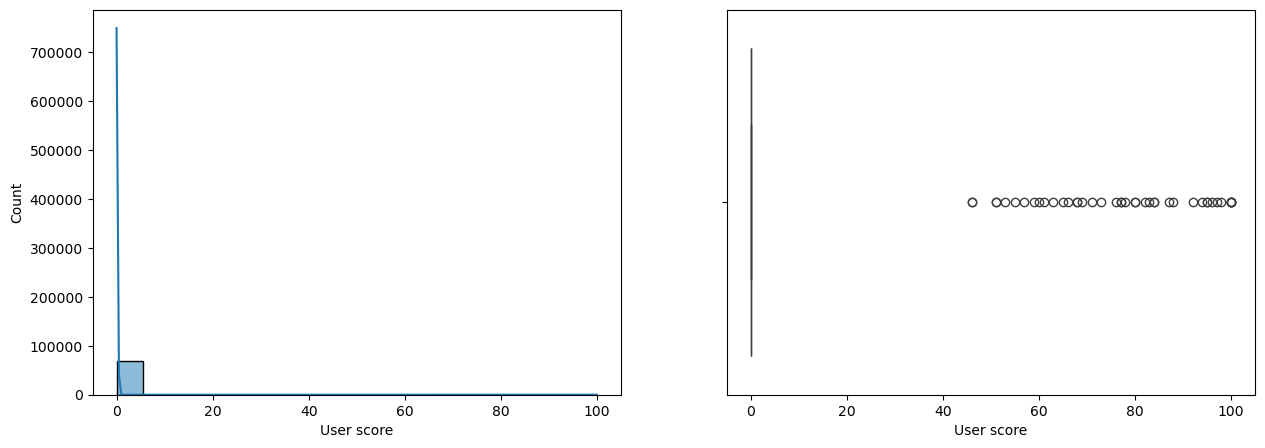

In [103]:
plot_hist_box(games, 'User score')

In [104]:
count_outliers(games, 'User score')

42

### Positive

In [105]:
games['Positive'].describe()

count    6.993600e+04
mean     1.133006e+03
std      2.678356e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+01
75%      6.200000e+01
max      5.764420e+06
Name: Positive, dtype: float64

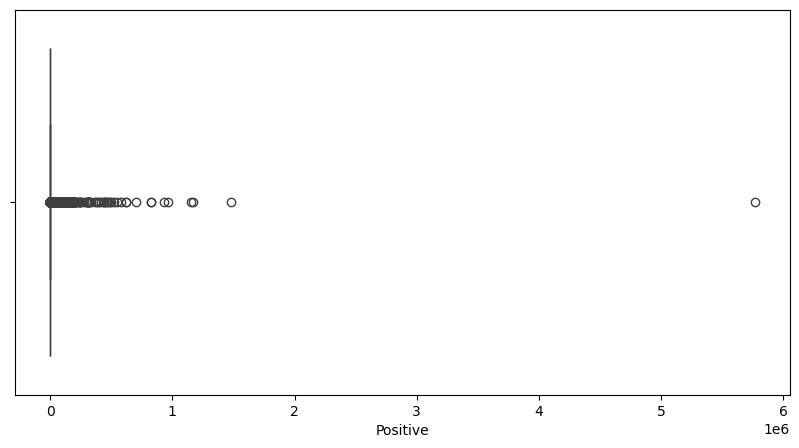

In [106]:
plot_box(games['Positive'], (10, 5))

In [107]:
count_outliers(games, 'Positive')

11853

### Negative

In [108]:
games['Negative'].describe()

count     69936.000000
mean        186.053120
std        5037.622404
min           0.000000
25%           0.000000
50%           3.000000
75%          19.000000
max      895978.000000
Name: Negative, dtype: float64

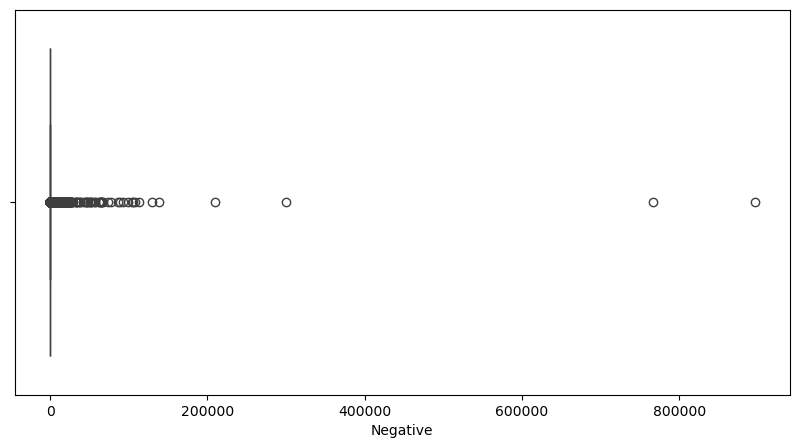

In [109]:
plot_box(games['Negative'], (10, 5))

In [110]:
count_outliers(games, 'Negative')

11160

### Achievements

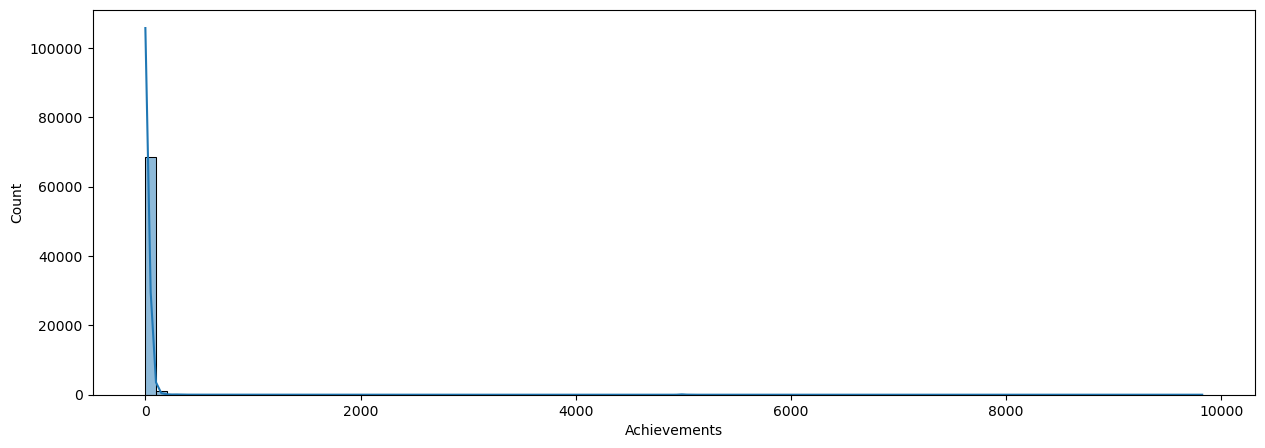

In [111]:
plot_hist(games['Achievements'], bins = 100, size = (15, 5), kde = True)

In [112]:
count_outliers(games, 'Achievements')

4953

### Recommendations

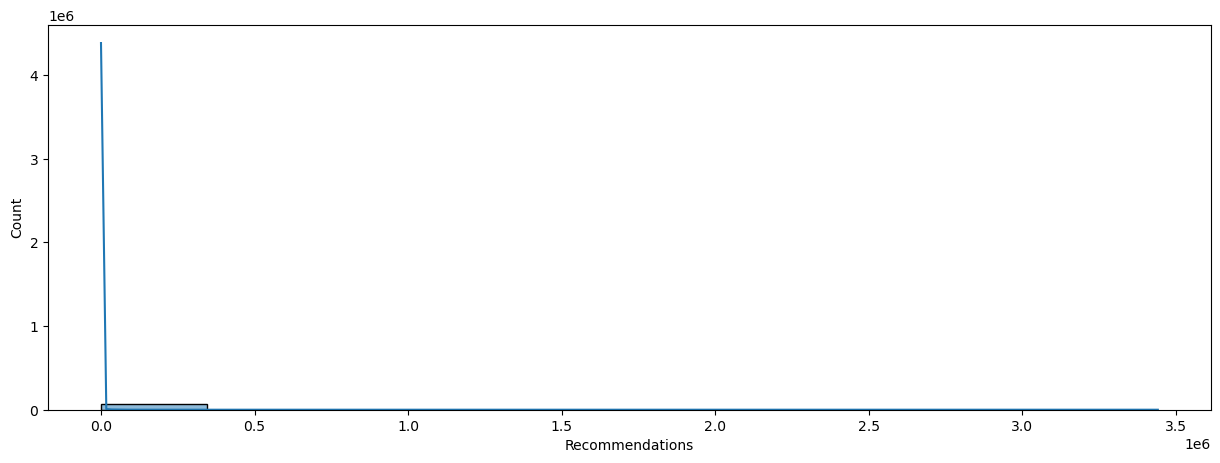

In [113]:
plot_hist(games['Recommendations'], bins = 10, kde = True, size = (15, 5))

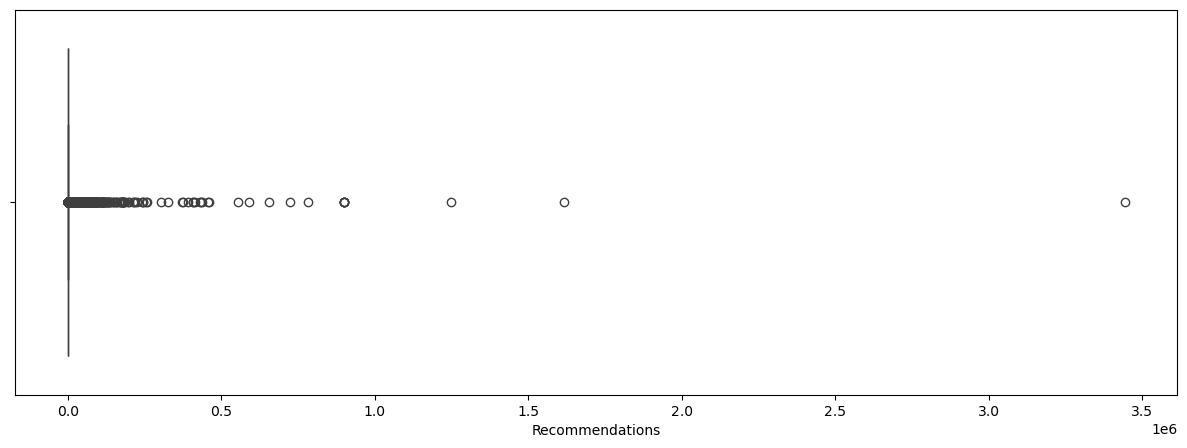

In [114]:
plot_box(games['Recommendations'], size = (15,5))

In [115]:
count_outliers(games, 'Recommendations')

12793

### Average playtime forever

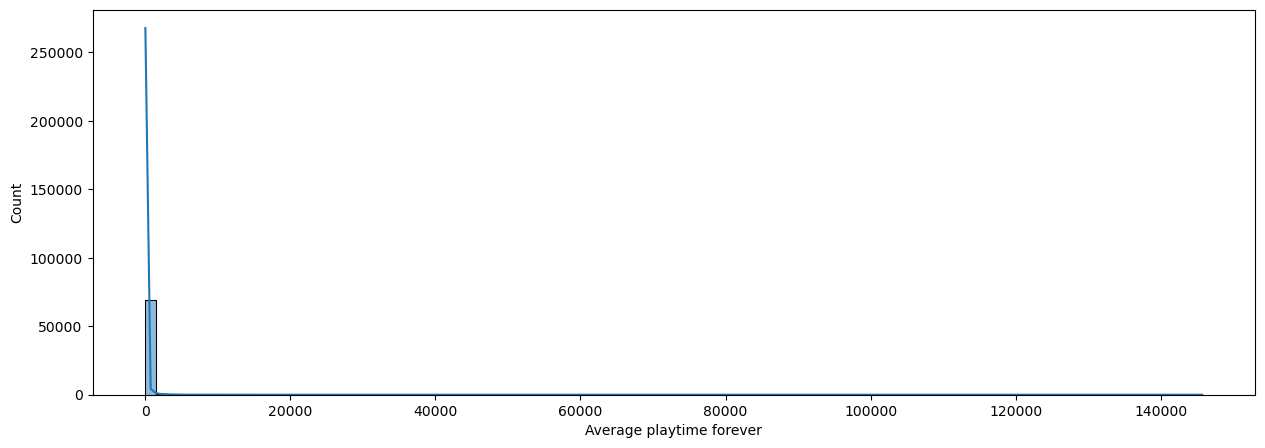

In [116]:
plot_hist(games['Average playtime forever'], bins = 100, kde = True, size = (15, 5))

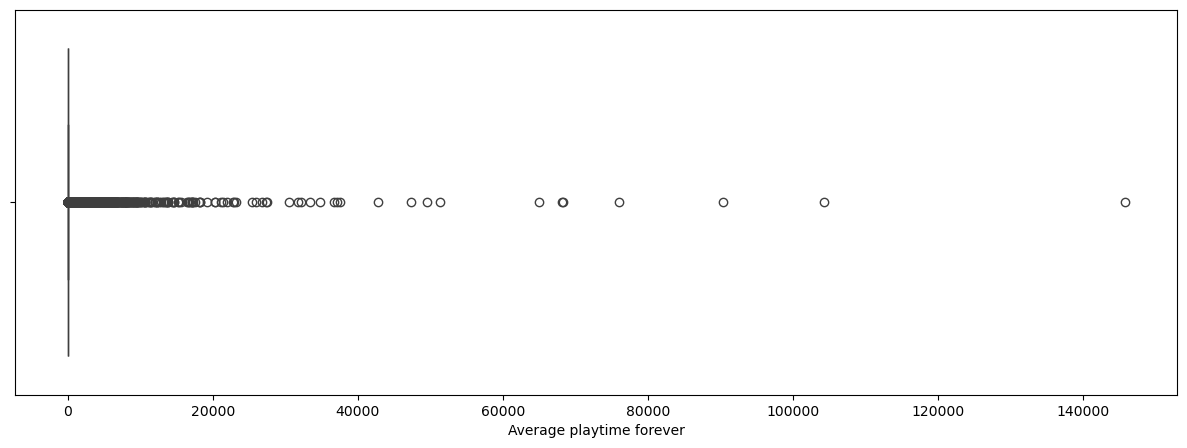

In [117]:
plot_box(games['Average playtime forever'], size = (15, 5))

### Average playtime two weeks

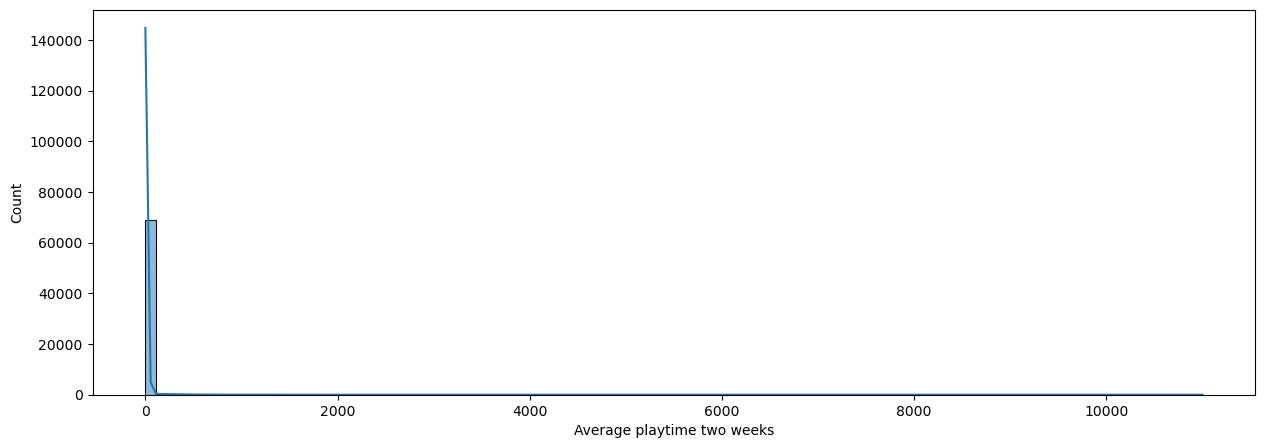

In [118]:
plot_hist(games['Average playtime two weeks'], bins = 100, kde = True, size = (15, 5))

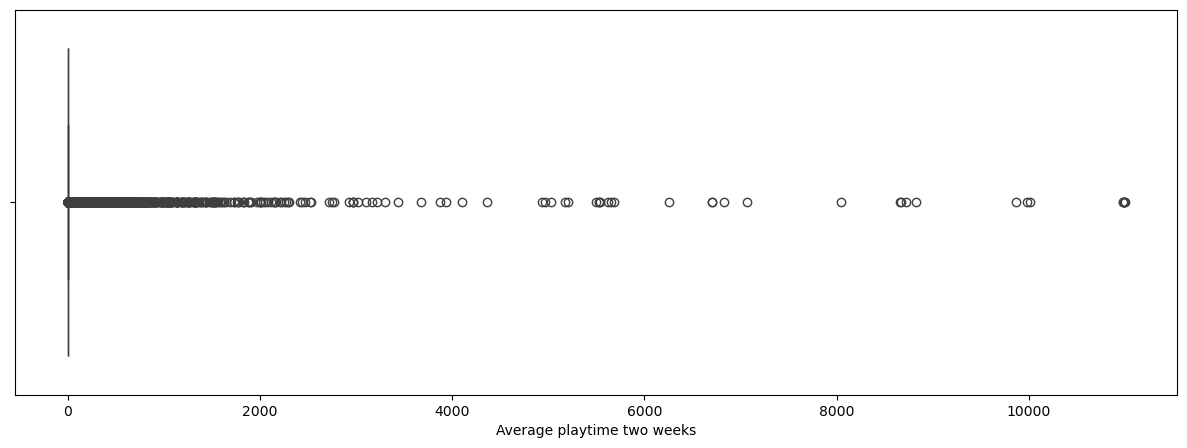

In [119]:
plot_box(games['Average playtime two weeks'], size = (15, 5))

### Median playtime forever

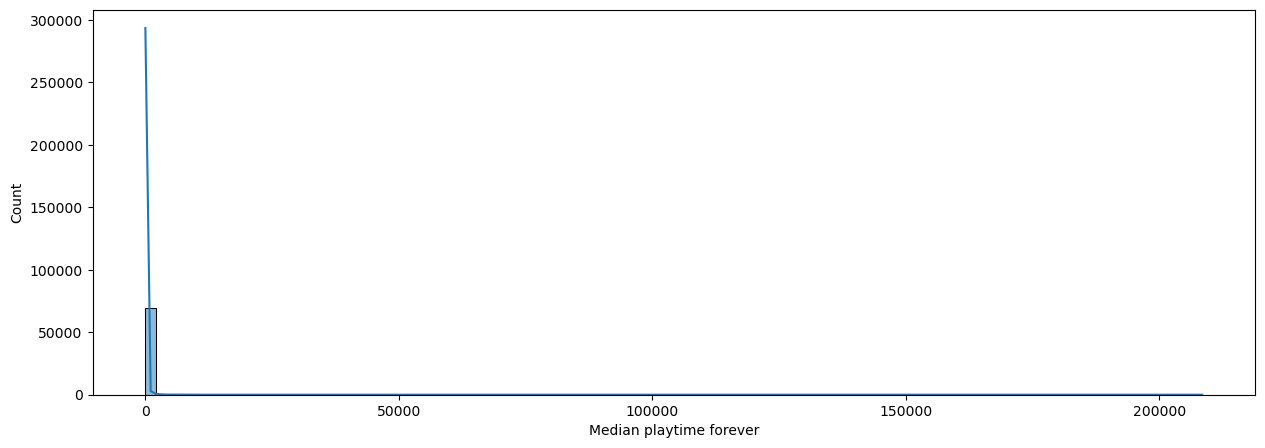

In [120]:
plot_hist(games['Median playtime forever'], bins = 100, kde = True, size = (15, 5))

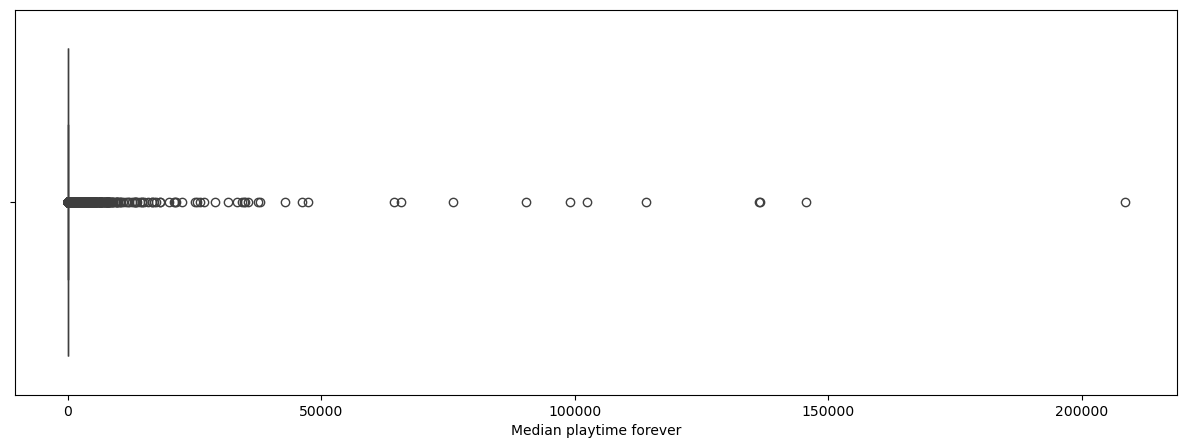

In [121]:
plot_box(games['Median playtime forever'], size = (15, 5))

### Median playtime two weeks

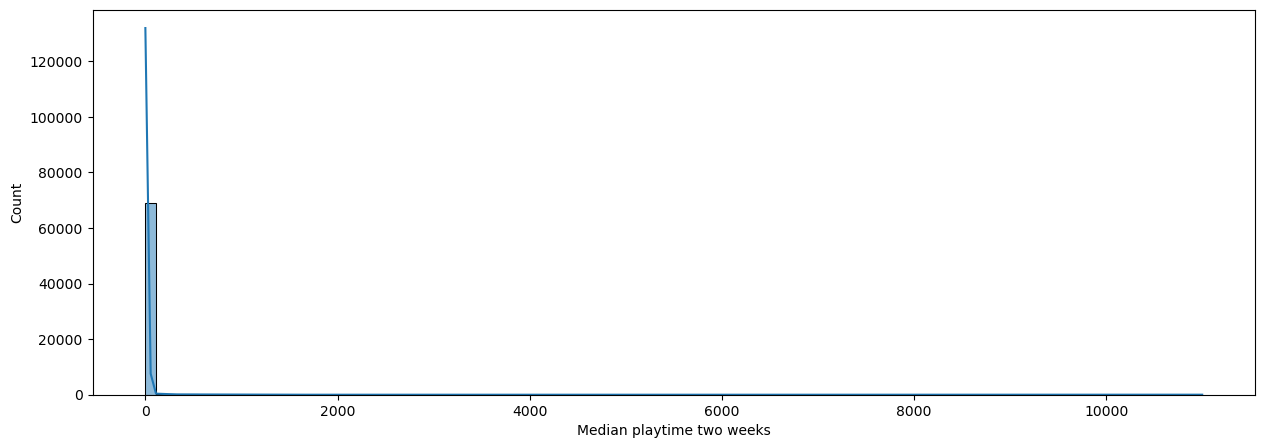

In [122]:
plot_hist(games['Median playtime two weeks'], bins = 100, kde = True, size = (15, 5))

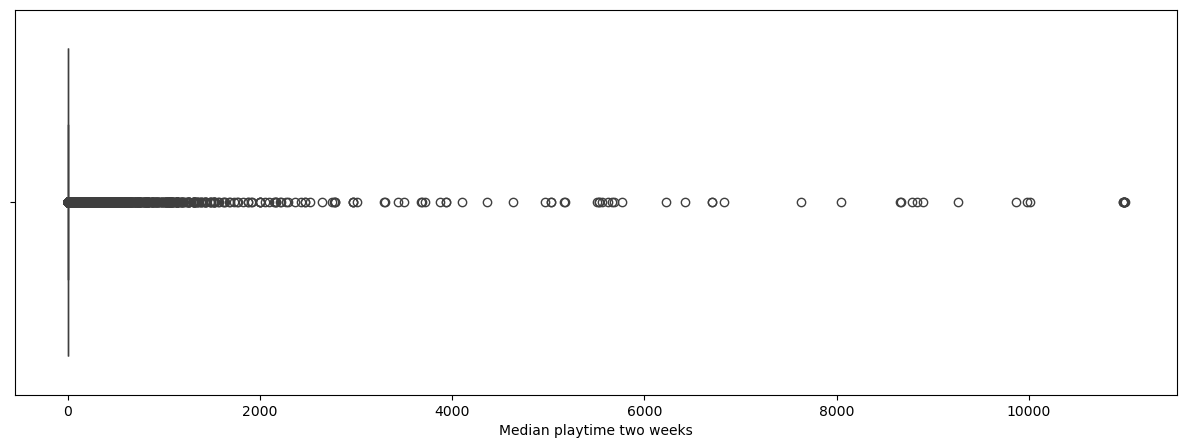

In [123]:
plot_box(games['Median playtime two weeks'], size = (15, 5))

## Pre-processing

In [124]:
outliers = ['Price']

In [125]:
replace_outliers(games, outliers)

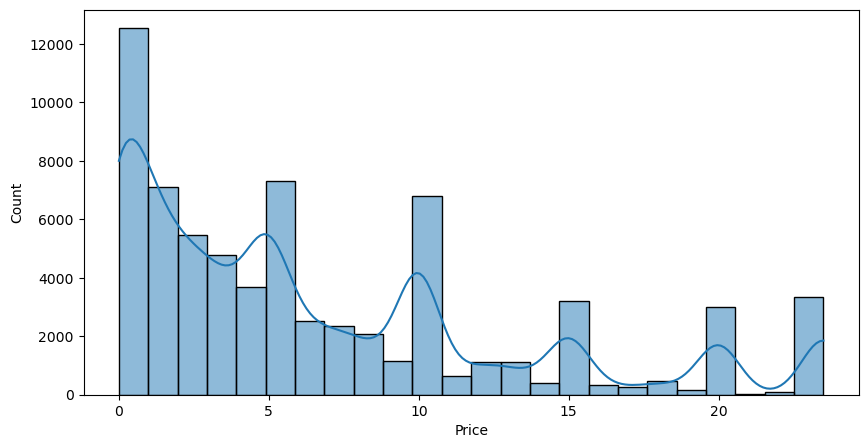

In [126]:
plot_hist(games['Price'], bins = 24, size = (10, 5), kde = True)

In [127]:
games['+15'] = games['Required age'].apply(lambda x: 1 if x >= 15 else 0)

In [128]:
games.drop(columns = ['Required age'], inplace = True)

In [129]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69936 entries, 0 to 71715
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Release date                69936 non-null  datetime64[ns]
 1   Estimated owners            69936 non-null  object        
 2   Peak CCU                    69936 non-null  int64         
 3   Price                       69936 non-null  float64       
 4   DLC count                   69936 non-null  int64         
 5   Supported languages         69936 non-null  object        
 6   Windows                     69936 non-null  bool          
 7   Mac                         69936 non-null  bool          
 8   Linux                       69936 non-null  bool          
 9   Metacritic score            69936 non-null  int64         
 10  User score                  69936 non-null  int64         
 11  Positive                    69936 non-null  int64         


# Save Dataset

In [130]:
games.to_csv('../data/games_clean.csv', index = False)

# Conclusions

- Visualization has been carried out to understand the distribution of numerical data, where normalization has been applied to all features except for the **Price** feature. Additionally, different types of normalization have been considered based on the distribution and the number of outliers present in each variable.